## Problem Set #[7]
MACS 30150, Dr. Evans

Linghui Wu

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import classification_report, mean_squared_error
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Question 1

#### (a)

In [2]:
drink = pd.read_csv("data/strongdrink.txt")
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = drink[["alco", "malic", "tot_phen", "color_int"]]
y = drink["cultivar"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)
clf = LogisticRegression(random_state=0, solver="lbfgs", multi_class="multinomial").fit(X_train, y_train)

results = {"Variables": ["beta0", "beta1", "beta2", "beta3", "beta4"],
          "j=1": np.hstack((clf.intercept_[0], clf.coef_[0])),
          "j=2": np.hstack((clf.intercept_[1], clf.coef_[1]))}
pd.DataFrame(results)

,Variables,j=1,j=2
0,beta0,-24.027621,22.780736
1,beta1,1.701735,-1.466297
2,beta2,-0.265788,-0.332953
3,beta3,1.224101,0.663556
4,beta4,0.022506,-0.922682


In [4]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

    accuracy                           0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



In [5]:
drink["cultivar"].value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

The error rates on the test set are **13%**, **0%**, and **0%** for group 1, 2 and 3 respectively.

The model is best at predicting **the third category** of cultivar because it has the highest f1-score among the three, but the most accurately predicted category (Group 3) is not the one with the most observations (Group 2).

In [6]:
mse = mean_squared_error(y_test, y_pred)
print("The MSE from the test set is {}.".format(mse))

The MSE from the test set is 0.045454545454545456.


#### (b)  LOOCV

In [7]:
Xvars = drink[["alco", "malic", "tot_phen", "color_int"]].values
yvars = drink["cultivar"]

N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)

MSE_vec = np.zeros(N_loo)
y_test_arr = np.zeros(N_loo)
y_pred_arr = np.zeros(N_loo)
for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    y_test_arr[test_index] = y_test
    
    LogReg = LogisticRegression(solver="lbfgs", multi_class="multinomial", max_iter=200)
    LogReg.fit(X_train, y_train)
    
    y_pred = LogReg.predict(X_test)
    y_pred_arr[test_index] = y_pred
    if y_pred == y_test_arr[test_index]:
        MSE_vec[test_index] = 0
    else:
        MSE_vec[test_index] = 1
    
    print('MSE for test set', test_index, ' is', MSE_vec[test_index])

MSE for test set [0]  is [0.]
MSE for test set [1]  is [0.]
MSE for test set [2]  is [0.]
MSE for test set [3]  is [0.]
MSE for test set [4]  is [0.]
MSE for test set [5]  is [0.]
MSE for test set [6]  is [0.]
MSE for test set [7]  is [0.]
MSE for test set [8]  is [0.]
MSE for test set [9]  is [0.]
MSE for test set [10]  is [0.]
MSE for test set [11]  is [0.]
MSE for test set [12]  is [0.]
MSE for test set [13]  is [0.]
MSE for test set [14]  is [0.]
MSE for test set [15]  is [0.]
MSE for test set [16]  is [0.]
MSE for test set [17]  is [0.]
MSE for test set [18]  is [0.]
MSE for test set [19]  is [0.]
MSE for test set [20]  is [0.]
MSE for test set [21]  is [0.]
MSE for test set [22]  is [0.]
MSE for test set [23]  is [1.]
MSE for test set [24]  is [0.]
MSE for test set [25]  is [1.]
MSE for test set [26]  is [0.]
MSE for test set [27]  is [0.]
MSE for test set [28]  is [0.]
MSE for test set [29]  is [0.]
MSE for test set [30]  is [0.]
MSE for test set [31]  is [0.]
MSE for test set [

In [8]:
MSE_loo_mean = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print("The LOOCV estimate MSE is {}.".format(MSE_loo_mean))
print("The LOOCV estimate standard error is {}.".format(MSE_loo_std))

The LOOCV estimate MSE is 0.07954545454545454.
The LOOCV estimate standard error is 0.2705882022679695.


In [9]:
print(classification_report(y_test_arr, y_pred_arr))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

    accuracy                           0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



The error rates on the test set are **10%**, **9%**, and **4%** for group 1, 2 and 3 respectively.

Compare to part(a), the error rate for $j=1$ decreased, while the error rate for $j=2$ and $j=3$ increased.

#### (c)

In [10]:
k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
MSE_vec_kf = np.zeros(k)
kf.get_n_splits(Xvars)

y_test_arr = np.zeros(N_loo)
y_pred_arr = np.zeros(N_loo)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    
    LogReg = LogisticRegression(solver="lbfgs", multi_class="multinomial", max_iter=200)
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    
    y_test_arr[test_index] = y_test
    y_pred_arr[test_index] = y_pred
    
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    print("The K-fold estimate MSE for the test set {} is {}.".format(k_ind, MSE_vec_kf[k_ind]))
    k_ind += 1

The K-fold estimate MSE for the test set 0 is 0.1590909090909091.
The K-fold estimate MSE for the test set 1 is 0.11363636363636363.
The K-fold estimate MSE for the test set 2 is 0.045454545454545456.
The K-fold estimate MSE for the test set 3 is 0.045454545454545456.


In [11]:
MSE_kf_mean = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print("The K-fold estimate MSE is {}.".format(MSE_kf_mean))
print("The K-fold estimate standard error is {}.".format(MSE_kf_std))

The K-fold estimate MSE is 0.09090909090909091.
The K-fold estimate standard error is 0.04821182598999188.


In [12]:
print(classification_report(y_test_arr, y_pred_arr))

              precision    recall  f1-score   support

         1.0       0.87      0.93      0.90        59
         2.0       0.91      0.87      0.89        71
         3.0       0.96      0.93      0.95        46

    accuracy                           0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



The error rates on the test set are **13%**, **9%**, and **4%** for group 1, 2 and 3 respectively. 

Compared to part(a), the error rate for $j=1$ remained unchanged, while the error rates for $j=2$ and $j=3$ increased.

Compared to part(b), the error rate for $j=1$ increased, while the error rates for $j=2$ and $j=3$ remained unchanged.

### Question 2

#### (a)

In [13]:
cool = pd.read_csv("data/CoolIndex.txt", names=["age", "coolness"])
cool.head()

,age,coolness
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


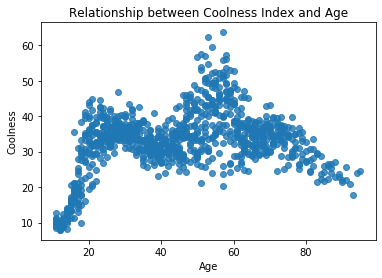

In [14]:
plt.scatter(cool["age"], cool["coolness"], alpha=0.8, marker="o")
plt.xlabel("Age")
plt.ylabel("Coolness")
plt.title("Relationship between Coolness Index and Age")
plt.show();

#### (b)

In [15]:
import statsmodels.api as sm

cool["a1"] = np.where((cool["age"] >= 11) & (cool["age"] < 22), 1, 0)
cool["a2"] = np.where((cool["age"] >= 22) & (cool["age"] < 40), 1, 0)
cool["a3"] = np.where((cool["age"] >= 40) & (cool["age"] < 59), 1, 0)
cool["a4"] = np.where((cool["age"] >= 59) & (cool["age"] < 77), 1, 0)
cool["a5"] = np.where((cool["age"] >= 77) & (cool["age"] <= 95), 1, 0)

X = cool[["a1", "a2", "a3", "a4", "a5"]]
y = cool["coolness"]

result = sm.OLS(endog=y, exog=X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               coolness   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          3.73e-114
Time:                        20:46:12   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a1            20.1025      0.562     35.746      0.0

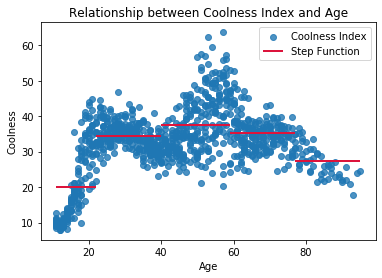

In [16]:
vals = result.params.values
plt.scatter(cool["age"], cool["coolness"], alpha=0.8, label="Coolness Index")
x_min = np.array([11, 22, 40, 59, 77])
x_max = np.array([22, 40, 59, 77, 95])
plt.hlines(vals, x_min, x_max, color="crimson", lw=2, label="Step Function")
plt.xlabel("Age")
plt.ylabel("Coolness")
plt.legend(loc="best")
plt.title("Relationship between Coolness Index and Age");

In [17]:
print("The estimated step funcion values for each bin are:")
print(result.params)

The estimated step funcion values for each bin are:
a1    20.102457
a2    34.475788
a3    37.635105
a4    35.225400
a5    27.296378
dtype: float64


In [18]:
pred_coolness1 = result.predict([0,0,0,1,0])
print("The predicted coolness of a 73-year old from the stepwise function is {}.".format(pred_coolness1[0]))

The predicted coolness of a 73-year old from the stepwise function is 35.22540004024275.


#### (c)

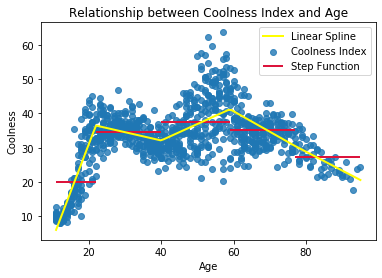

In [19]:
from scipy.interpolate import LSQUnivariateSpline
t = np.array([22, 40, 59, 77])
cool.sort_index(0, ascending=True, inplace=True)
group = cool.groupby("age", as_index=False).mean()
linear_spline = LSQUnivariateSpline(group["age"].values, group["coolness"].values, t, k=1)
age_vals = np.linspace(cool["age"].min(), cool["age"].max(), 100)

plt.scatter(cool["age"], cool["coolness"], alpha=0.8, label="Coolness Index")
plt.hlines(vals, x_min, x_max, color="crimson", lw=2, label="Step Function")
plt.plot(age_vals, linear_spline(age_vals), color="yellow", lw=2, label="Linear Spline")
plt.xlabel("Age")
plt.ylabel("Coolness")
plt.legend(loc="best")
plt.title("Relationship between Coolness Index and Age");

In [20]:
pred_coolness2 = linear_spline(73)
print("The predicted coolness of a 73-year old from the linear spline is {}.".format(pred_coolness2))

The predicted coolness of a 73-year old from the linear spline is 32.86784862349653.


#### (d)

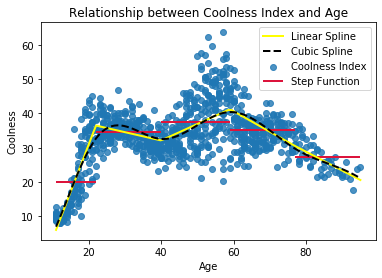

In [21]:
cubic_spline = LSQUnivariateSpline(group["age"].values, group["coolness"].values, t, k=3)

plt.scatter(cool["age"], cool["coolness"], alpha=0.8, label="Coolness Index")
plt.hlines(vals, x_min, x_max, color="crimson", lw=2, label="Step Function")
plt.plot(age_vals, linear_spline(age_vals), color="yellow", lw=2, label="Linear Spline")
plt.plot(age_vals, cubic_spline(age_vals), color="black", lw=2, ls="--", label="Cubic Spline")
plt.xlabel("Age")
plt.ylabel("Coolness")
plt.legend(loc="best")
plt.title("Relationship between Coolness Index and Age");

In [22]:
pred_coolness3 = cubic_spline(73)
print("The predicted coolness of a 73-year old from the cubic spline is {}.".format(pred_coolness3))

The predicted coolness of a 73-year old from the cubic spline is 32.642301066279764.
